In [1]:
from snn_delays.utils.model_loader_refac import ModelLoader

snn = ModelLoader('ibm_gest_ffw', 'capocaccia_live', 1, 'cpu', live = True)

Delta t: 20.0 ms
Delta t: 20.0 ms
Delta t: 20.0 ms
Delta t: 20.0 ms
Instance of <class 'snn_delays.snn_refactored.SNN'> loaded successfully


c:\Users\Alberto\anaconda3\envs\deeplearning\lib\site-packages\torch\serialization.py:1113: SourceChangeWarning: source code of class 'snn_delays.snn_refactored.SNN' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [2]:
import torch
import time
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import get_device

'''
SHD dataset as in ablation study
'''

device = get_device()
dataset = 'ibm_gestures'
num_steps = 50
batch_size = 1

# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=num_steps,
                  sensor_size_to=32,
                  crop_to=1e6)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

Running on: cpu
[CropTime(min=0, max=1000000.0), Downsample(time_factor=1, spatial_factor=0.25, sensor_size=None, target_size=None), ToFrame(sensor_size=(32, 32, 2), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]


In [3]:
for images, labels in test_loader:

    for step in range(num_steps):
        im_step = images[:, step, :, :, :]
        print(im_step.shape)
        pred = snn.propagate_live(im_step)    
    
    snn.reset_state_live()

    print(f'pred: {pred}, ref: {labels}')

    break

    



torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
torch.Size([1, 2, 32, 32])
t

In [5]:
len(snn.mems_fifo['l1'])

50

In [7]:
snn.mems_fifo['output']

deque([tensor([[ 0.0341,  0.0711,  0.1662, -0.1986, -0.0543, -0.1864, -0.2389, -0.3365,
                -0.1722, -0.1570,  0.0594]]),
       tensor([[ 0.0238, -0.0489,  0.1488, -0.4448,  0.0713, -0.2154, -0.3068, -0.2719,
                -0.1552, -0.2131,  0.5384]]),
       tensor([[-0.1229, -0.2614,  0.0862, -0.3619,  0.0466, -0.2949, -0.2953, -0.3080,
                -0.2874, -0.4040,  0.3547]]),
       tensor([[-0.2950, -0.2394,  0.2527, -0.2898,  0.0933, -0.0428, -0.1693, -0.3933,
                -0.4537, -0.3689,  0.4301]]),
       tensor([[-0.3782, -0.3127,  0.1839, -0.2827,  0.1648,  0.0374,  0.1061, -0.7090,
                -0.4268, -0.5313,  0.5188]]),
       tensor([[-0.3258, -0.4832,  0.2892, -0.5258, -0.0128, -0.0640,  0.0283, -0.6652,
                -0.5997, -0.7966,  0.5128]]),
       tensor([[-1.2261e-01, -2.4258e-01,  3.0635e-01, -4.5718e-01, -4.0606e-07,
                -6.8085e-02,  1.1966e-02, -7.1625e-01, -4.1969e-01, -7.8453e-01,
                 6.7241e-01]]),
  

In [20]:
mems = torch.stack(list(snn.mems_fifo)).squeeze().cpu().numpy()

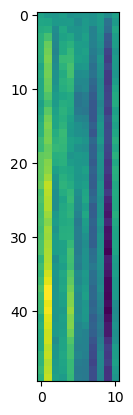

In [21]:
import matplotlib.pyplot as plt

plt.imshow(mems)

